In [5]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#Logistic Equation
def n(n0, r, k, max=np.inf):
    t, nt = 0, n0
    while t < max:
        yield nt
        t, nt = t + 1, nt + r * nt * (1 - nt / k)

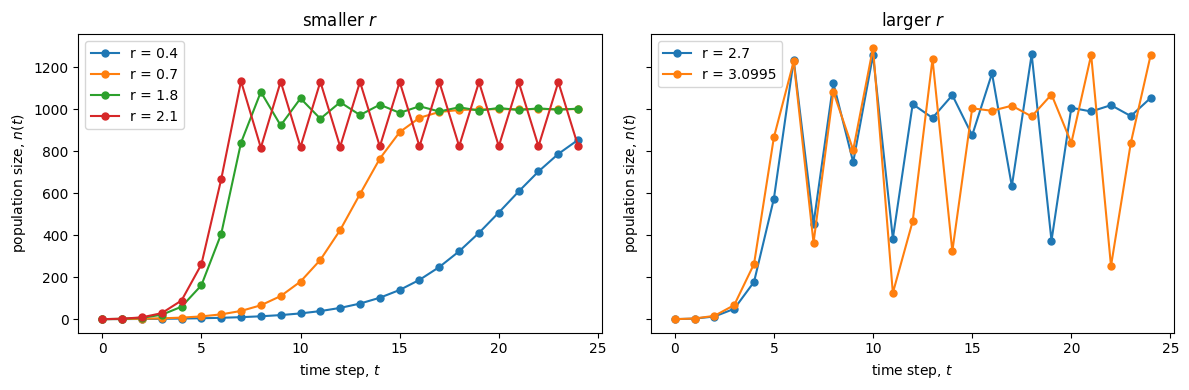

In [16]:
# Initialize plots
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches(12,4)

# Logistic growth with smaller r values
for r in [0.40, 0.70, 1.80, 2.10]:
    ax[0].plot( #plot lines connecting values for visual clarity
        range(25),
        [nt for nt in n(1, r, 1000, max=25)],
        label = f"r = {r}",
        marker = '.', markersize = 10
    )

# Logistic growth with larger r values
for r in [2.70, 3.0995]:
    ax[1].plot(
        range(25),
        [nt for nt in n(1, r, 1000, max=25)],
        label = f"r = {r}",
        marker = '.', markersize = 10
    )

# Add titles and annotations
ax[0].set_title('smaller $r$')
ax[1].set_title('larger $r$')
for i in range(2):
    ax[i].set_xlabel('time step, $t$')
    ax[i].set_ylabel('population size, $n(t)$')
    ax[i].legend()

fig.tight_layout()
plt.show()

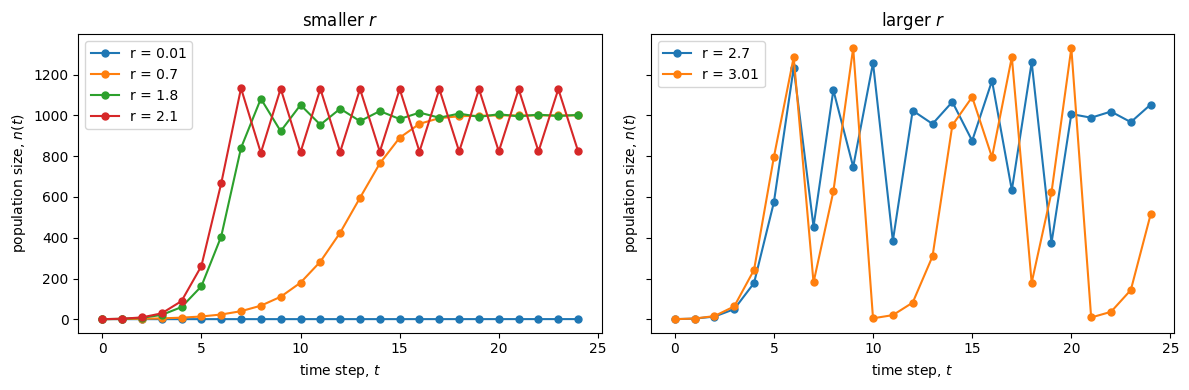

In [38]:
# Initialize plots
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches(12,4)

# Logistic growth with smaller r values
for r in [0.01, 0.70, 1.80, 2.10]:
    ax[0].plot( #plot lines connecting values for visual clarity
        range(25),
        [nt for nt in n(1, r, 1000, max=25)],
        label = f"r = {r}",
        marker = '.', markersize = 10
    )

# Logistic growth with larger r values
for r in [2.70, 3.01]:
    ax[1].plot(
        range(25),
        [nt for nt in n(1, r, 1000, max=25)],
        label = f"r = {r}",
        marker = '.', markersize = 10
    )

# Add titles and annotations
ax[0].set_title('smaller $r$')
ax[1].set_title('larger $r$')
for i in range(2):
    ax[i].set_xlabel('time step, $t$')
    ax[i].set_ylabel('population size, $n(t)$')
    ax[i].legend()

fig.tight_layout()
plt.show()

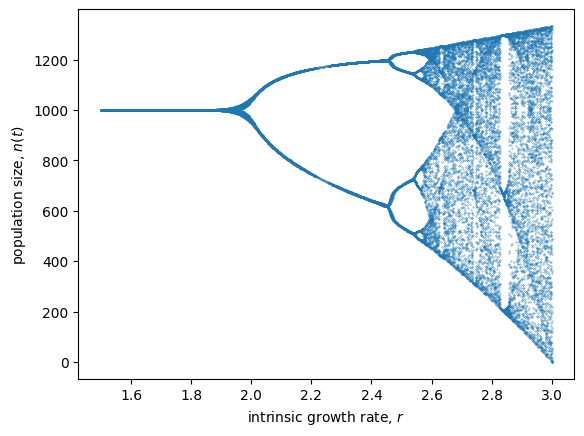

In [39]:
# Sample the periodicity of the oscillations
# by taking unique values after reaching carrying capacity (here we use t between 30 and 75)
def log_map(r, n0=900, k=1000):
    return np.unique([nt for t, nt in enumerate(n(n0, r, k, max=75)) if t > 30])

# Compute the logistic map for different growth rates in discrete time
r, Nr = np.array([]), np.array([]) #list of r and n(t) values we will plot
for i in np.linspace(1.5, 3, 1000): #these are the r values we will simulate
    nl = log_map(i) #get the unique values after carrying capacity
    r = np.hstack((r, [i for _ in range(len(nl))])) #add the r value to plotting list (repeat the value of r for each unique n(t) value (for plotting))
    Nr = np.hstack((Nr, nl)) #add the n(t) values to plotting list

fig, ax = plt.subplots()
ax.scatter(r, Nr, s=0.075)
plt.xlabel('intrinsic growth rate, $r$')
plt.ylabel('population size, $n(t)$')
plt.show()